# The Great Oxidation Event

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PhotochemPy import PhotochemPy
import time

template = 'Archean2Proterozoic'
sun = 'Sun_2.7Ga.txt'

pc = PhotochemPy('../../input/templates/'+template+'/species.dat', \
                 '../../input/templates/'+template+'/reactions.rx', \
                 '../../input/templates/'+template+'/planet.dat', \
                 '../../input/templates/'+template+'/input_photchem.dat', \
                 '../../input/templates/'+template+'/atmosphere.txt', \
                 '../../input/templates/'+template+'/'+sun)

In [2]:
pc.set_surfflux('O2',4e10) # set surface flux a bit higher so GOE happens

This takes a few minutes

In [3]:
teval = np.logspace(5,14,1000)
%time solution = pc.evolve(0.0,pc.photo.usol_init,teval,atol=1e-30)

CPU times: user 7min 24s, sys: 3.86 s, total: 7min 28s
Wall time: 5min 25s


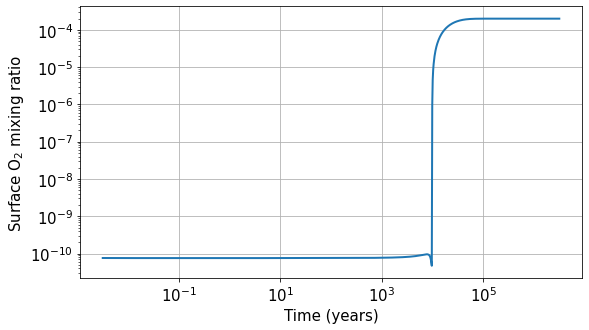

In [4]:
plt.rcParams.update({'font.size': 15})
fig,ax = plt.subplots(1,1,figsize=[9,5])
yr = 365*24*60*60
ind = pc.ispec.index('O2')
ax.plot(teval/yr,solution[:,ind,0],'C0-',lw=2)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Surface O$_2$ mixing ratio')
ax.set_xlabel('Time (years)')
ax.grid()
# plt.savefig('GOE.pdf',bbox_inches='tight')
plt.show()